**This notebook represents a Classification ANN model**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


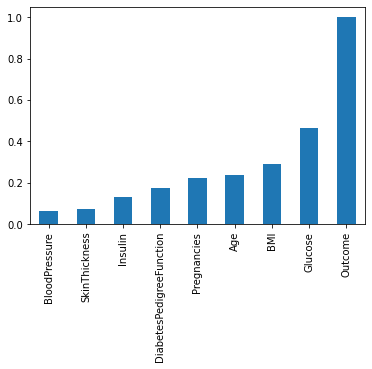

In [5]:
df.corr()['Outcome'].sort_values().plot(kind='bar')

In [6]:
X=df.drop('Outcome',axis=1).values

In [7]:
y=df['Outcome'].values

In [8]:
X.shape

(768, 8)

In [9]:
y.shape

(768,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
X_train=scaler.fit_transform(X_train)

In [15]:
X_test=scaler.transform(X_test)

In [16]:
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [19]:
model=Sequential()
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,callbacks=[early_stop])

Epoch 1/500
17/17 [==============================] - 1s 25ms/step - loss: 0.6931 - accuracy: 0.5486 - val_loss: 0.6821 - val_accuracy: 0.6378
Epoch 2/500
17/17 [==============================] - 0s 7ms/step - loss: 0.6748 - accuracy: 0.6206 - val_loss: 0.6713 - val_accuracy: 0.6378
Epoch 3/500
17/17 [==============================] - 0s 7ms/step - loss: 0.6675 - accuracy: 0.6498 - val_loss: 0.6655 - val_accuracy: 0.6378
Epoch 4/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6712 - accuracy: 0.6556 - val_loss: 0.6631 - val_accuracy: 0.6378
Epoch 5/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.6654 - val_loss: 0.6591 - val_accuracy: 0.6378
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6606 - accuracy: 0.6673 - val_loss: 0.6562 - val_accuracy: 0.6378
Epoch 7/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6576 - val_loss: 0.6547 - val_accuracy: 0.6378
Epoch 8/500


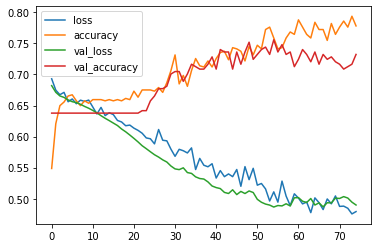

In [21]:
performence_metrics=pd.DataFrame(model.history.history)
performence_metrics.plot()

In [22]:
predictions=(model.predict(X_test) > 0.5).astype("int32")

8/8 [==============================] - 0s 2ms/step


In [23]:
predictions.shape

(254, 1)

In [24]:
test_predictions=pd.Series(predictions.reshape(254,))

In [25]:
pred_df=pd.DataFrame(y_test,columns=['Y-True'])

In [26]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [27]:
pred_df.columns=['Y_true','Predicted Y']

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
print(confusion_matrix(y_test,predictions))

[[135  27]
 [ 41  51]]


AxesSubplot(0.125,0.125;0.62x0.755)


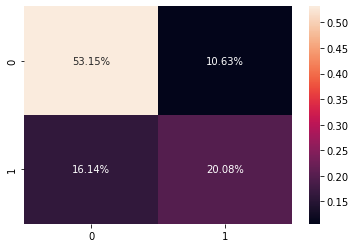

In [32]:
cf_mat=confusion_matrix(y_test,predictions)
print(sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, fmt='.2%'))

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       162
           1       0.65      0.55      0.60        92

    accuracy                           0.73       254
   macro avg       0.71      0.69      0.70       254
weighted avg       0.73      0.73      0.73       254



In [31]:
model.save('diabetes_weights.h5')